## RESTAURANT ANALYSIS--Behind Every Order
* dig into restaurant orders, delivery times, and what keeps customers coming back.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Orders2.csv')

In [2]:
df.head()

,Order ID,Customer Name,Restaurant ID,Order Date,Quantity of Items,Order Amount,Payment Mode,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
0,OD1,Srini,6,01-01-2022 23:15,5,633,Debit Card,47,5,3
1,OD2,Revandh,13,01-01-2022 19:21,5,258,Credit Card,41,3,5
2,OD3,David,9,01-01-2022 23:15,7,594,Cash on Delivery,30,3,4
3,OD4,Selva,4,01-01-2022 20:31,5,868,Cash on Delivery,30,3,4
4,OD5,Vinny,4,01-01-2022 11:10,4,170,Debit Card,18,4,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Order ID                    500 non-null    object
 1   Customer Name               500 non-null    object
 2   Restaurant ID               500 non-null    int64 
 3   Order Date                  500 non-null    object
 4   Quantity of Items           500 non-null    int64 
 5   Order Amount                500 non-null    int64 
 6   Payment Mode                500 non-null    object
 7   Delivery Time Taken (mins)  500 non-null    int64 
 8   Customer Rating-Food        500 non-null    int64 
 9   Customer Rating-Delivery    500 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 39.2+ KB


In [4]:
df.describe()

,Restaurant ID,Quantity of Items,Order Amount,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,10.672000,4.652000,598.142000,30.542000,3.362000,2.992000
std,5.960829,1.623628,296.613981,11.883209,1.240174,1.392773
min,1.000000,1.000000,3.000000,10.000000,1.000000,1.000000
25%,5.750000,4.000000,398.500000,21.000000,2.000000,2.000000
50%,11.000000,5.000000,610.500000,30.000000,3.000000,3.000000
75%,16.000000,6.000000,828.500000,41.000000,4.000000,4.000000
max,20.000000,7.000000,1198.000000,50.000000,5.000000,5.000000


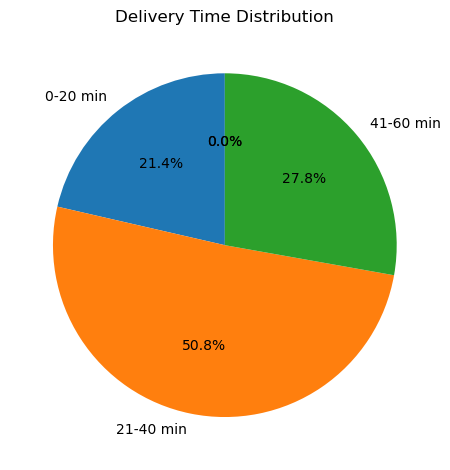

In [5]:
#shows what percentage of total deliveries were completed in each duration.

bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20 min', '21-40 min', '41-60 min', '61-80 min', '81-100+ min']
df['Delivery Time Range'] = pd.cut(df['Delivery Time Taken (mins)'], bins=bins, labels=labels, right=False)

time_range_counts = df['Delivery Time Range'].value_counts().sort_index()
time_range_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Delivery Time Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


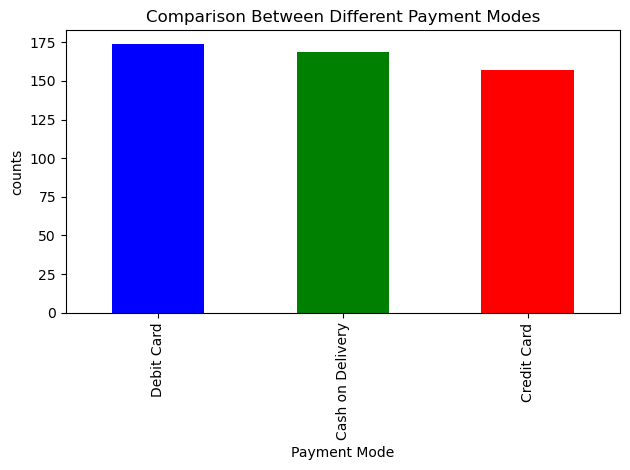

In [6]:
# shows how often each payment mode was used in the dataset.

payment_mode=df['Payment Mode'].value_counts()
payment_mode.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Comparison Between Different Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('counts')
plt.tight_layout()
plt.show()

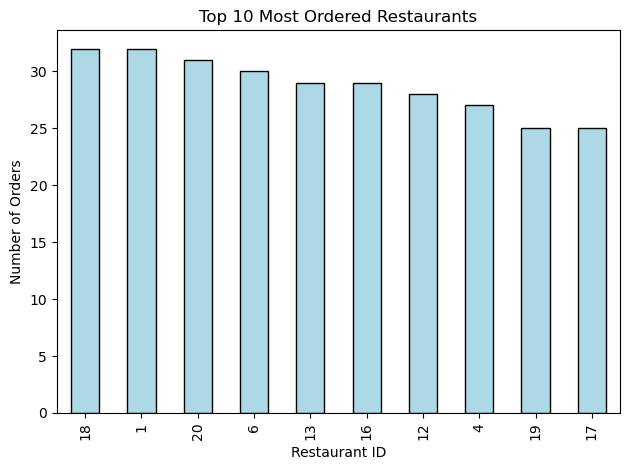

In [7]:
# shows the Top 10 most ordered-from restaurants.

top_restaurants = df['Restaurant ID'].value_counts().head(10)
top_restaurants.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 Most Ordered Restaurants')
plt.xlabel('Restaurant ID')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


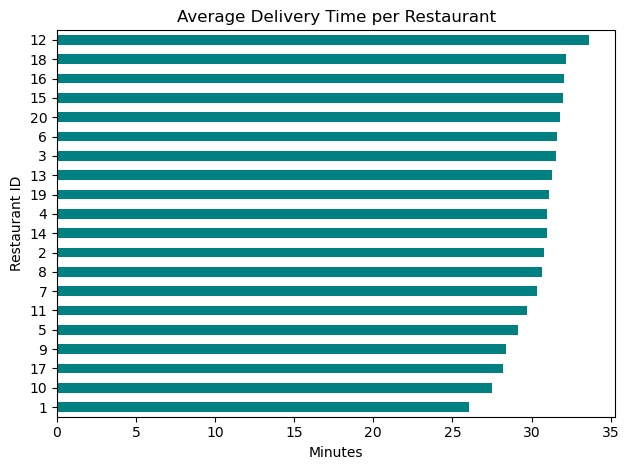

In [8]:
# helps in identifying which restaurants are fastest or slowest at delivering orders.

Avg_delivery_time = df.groupby('Restaurant ID')['Delivery Time Taken (mins)'].mean().sort_values(ascending=True)
Avg_delivery_time.plot(kind='barh', color='teal')
plt.title("Average Delivery Time per Restaurant")
plt.xlabel("Minutes")
plt.ylabel("Restaurant ID")
plt.tight_layout()
plt.show()


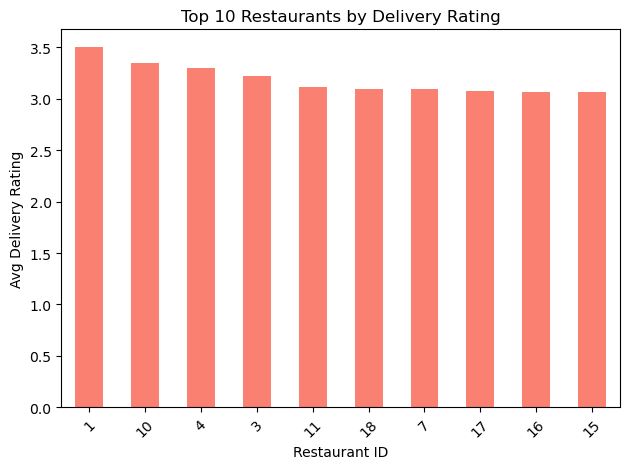

In [9]:
# shows top restaurants.

liked_restaurants = df.groupby('Restaurant ID')['Customer Rating-Delivery'].mean().sort_values(ascending=False).head(10)
liked_restaurants.plot(kind='bar', color='salmon')
plt.title("Top 10 Restaurants by Delivery Rating")
plt.xlabel("Restaurant ID")
plt.ylabel("Avg Delivery Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


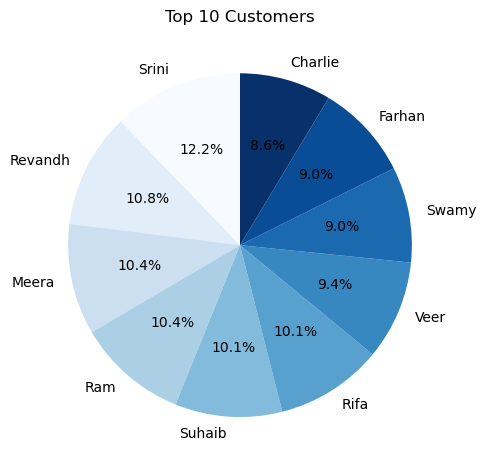

In [10]:
# shows proportion of orders made by the top 10 most active customers.

top_customer=df['Customer Name'].value_counts().head(10)
top_customer.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Blues')
plt.title("Top 10 Customers")
plt.ylabel("")
plt.tight_layout()
plt.show()

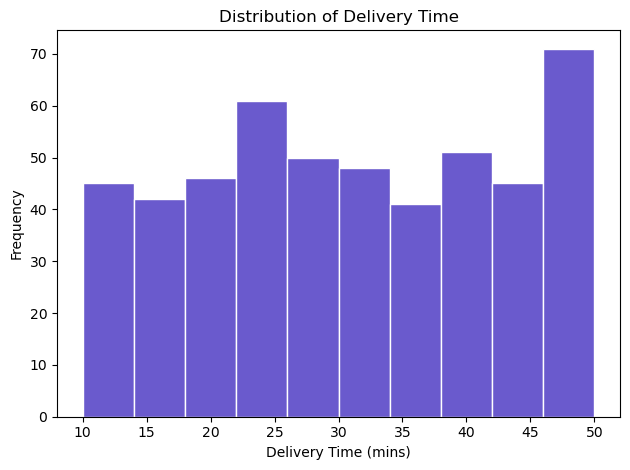

In [11]:
# shows how delivery times are distributed across all orders.

deliv_time=df['Delivery Time Taken (mins)']
deliv_time.plot(kind='hist', bins=10, color='slateblue', edgecolor='white')
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (mins)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


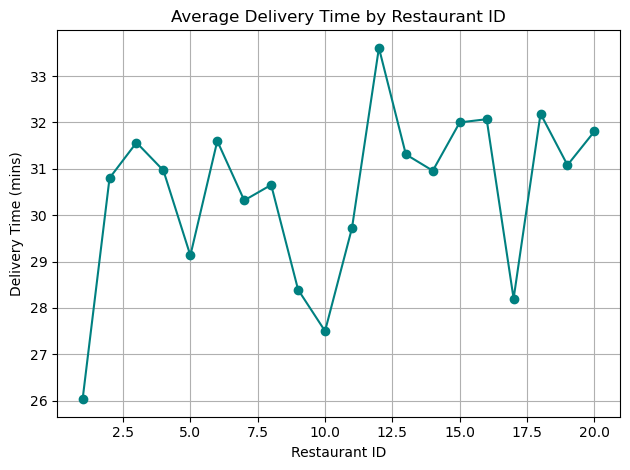

In [12]:
# shows the fastest and slowest deliveries by restaurants.

avg_time = df.groupby('Restaurant ID')['Delivery Time Taken (mins)'].mean().sort_index()
avg_time.plot(kind='line', marker='o', color='teal')
plt.title("Average Delivery Time by Restaurant ID")
plt.xlabel("Restaurant ID")
plt.ylabel("Delivery Time (mins)")
plt.grid()
plt.tight_layout()
plt.show()
